In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline



In [5]:
train = pd.read_csv(r"/Users/vimal/Downloads/Old/jupuytr/train.csv" )
test = pd.read_csv(r"/Users/vimal/Downloads/Old/jupuytr/test.csv")

In [6]:
df = train[(train['Occurrence Year'] >= 2013) & (train['Occurrence Year'] <= 2015)].copy()

In [7]:
df['Occurrence Day'] = df['Occurrence Day'].fillna(0).astype(int)
df['Occurrence Year'] = df['Occurrence Year'].fillna(0).astype(int)
df['Occurrence Hour'] = df['Occurrence Hour'].fillna(0).astype(int)
df['CompStat Month'] = df['CompStat Month'].fillna(0).astype(int)
df['CompStat Day'] = df['CompStat Day'].fillna(0).astype(int)
df['CompStat Year'] = df['CompStat Year'].fillna(0).astype(int)


In [8]:
df['Offense'] = df['Offense'].astype('category')
df['Jurisdiction'] = df['Jurisdiction'].astype('category')
df['Precinct'] = df['Precinct'].astype('category')
df['Borough'] = df['Borough'].astype('category')
df['Sector'] = df['Sector'].astype('category')
df['Identifier'] = df['Identifier'].astype('category')
df['Location 1'] = df['Location 1'].astype('category')
df['Occurrence Month'] = df['Occurrence Month'].astype('category')
df['Day of Week'] = df['Day of Week'].astype('category')

In [9]:
df['Occurrence Datetime'] = pd.to_datetime(df['Occurrence Datetime'])
df['Occurrence Date'] = pd.to_datetime(df['Occurrence Date'])
df.dtypes

Identifier                   category
Occurrence Datetime    datetime64[ns]
Day of Week                  category
Occurrence Month             category
Occurrence Day                  int64
Occurrence Year                 int64
Occurrence Hour                 int64
CompStat Month                  int64
CompStat Day                    int64
CompStat Year                   int64
Offense                      category
Sector                       category
Precinct                     category
Borough                      category
Jurisdiction                 category
XCoordinate                     int64
YCoordinate                     int64
Location 1                   category
Occurrence Date        datetime64[ns]
dtype: object

In [10]:
offense_by_hour = df['Occurrence Date'].groupby([df['Occurrence Hour'], df['Offense']]).count().unstack()
offense_by_hour.head()

Offense,BURGLARY,FELONY ASSAULT,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,MURDER & NON-NEGL. MANSLAUGHTE,RAPE,ROBBERY
Occurrence Hour,,,,,,,
0,1013,2125,4639,594,50,287,1672
1,878,1935,2182,545,36,126,1643
2,860,1862,2044,414,32,147,1575
3,752,1817,1648,293,35,132,1510
4,745,1630,1281,281,34,139,1571


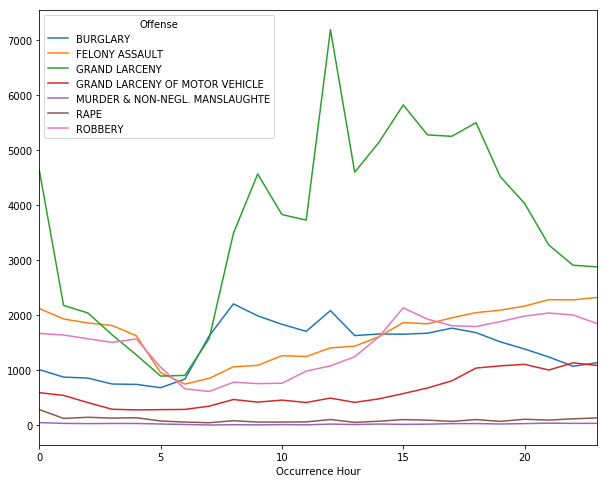

In [11]:
offense_by_hour.plot(figsize=(10,8))

In [12]:
offense_by_year = df['Occurrence Date'].groupby([df['Occurrence Year'], df['Offense']]).count().unstack()


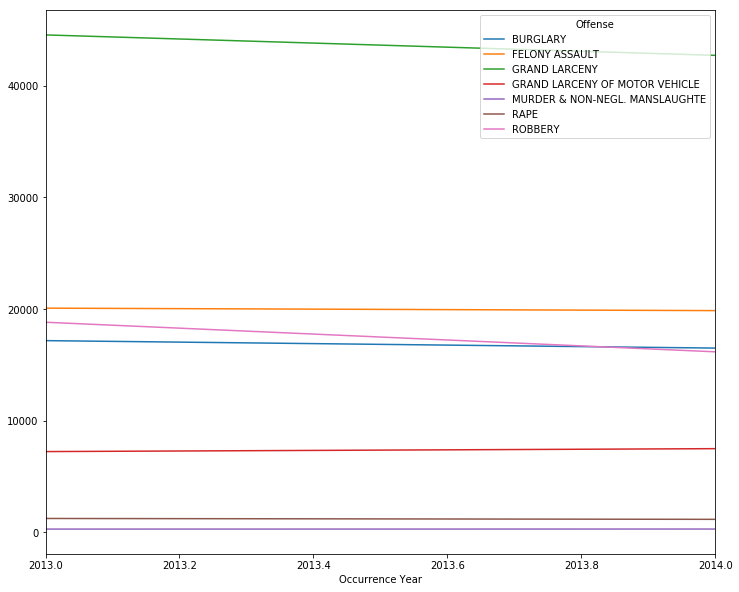

In [13]:
offense_by_year.plot(figsize=(12,10))

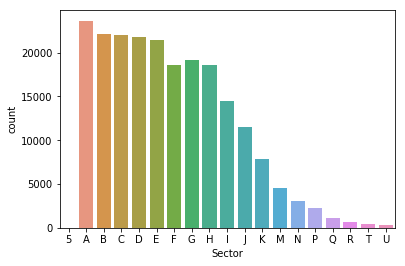

In [14]:
sns.countplot(x = 'Sector', data = df)

In [15]:
dfc = df.corr()
dfc

,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,XCoordinate,YCoordinate
Occurrence Day,1.000000,-0.003299,0.013170,0.006129,0.761414,-0.002132,0.000634,0.004122
Occurrence Year,-0.003299,1.000000,0.002264,-0.015072,-0.003049,0.955502,-0.000996,0.001561
Occurrence Hour,0.013170,0.002264,1.000000,-0.002902,0.003574,-0.007554,0.009116,-0.008726
CompStat Month,0.006129,-0.015072,-0.002902,1.000000,-0.000567,-0.058514,0.000329,-0.001673
CompStat Day,0.761414,-0.003049,0.003574,-0.000567,1.000000,-0.013241,-0.000286,0.001242
CompStat Year,-0.002132,0.955502,-0.007554,-0.058514,-0.013241,1.000000,-0.003369,0.002542
XCoordinate,0.000634,-0.000996,0.009116,0.000329,-0.000286,-0.003369,1.000000,0.251975
YCoordinate,0.004122,0.001561,-0.008726,-0.001673,0.001242,0.002542,0.251975,1.000000


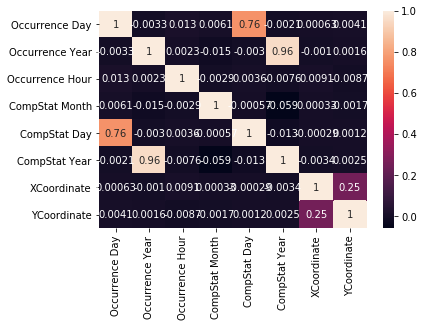

In [19]:
sns.heatmap(dfc , annot = True)

In [20]:
dfp = df.pivot_table(index = 'Occurrence Month', columns = 'Occurrence Year', values = 'Occurrence Day')

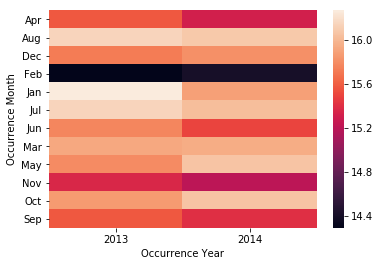

In [21]:
sns.heatmap(dfp)

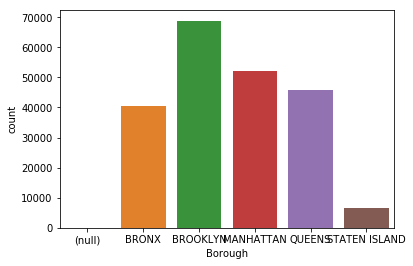

In [22]:
sns.countplot('Borough', data =df )

In [24]:
data = dict(type ='choropleth',
           colorscale = 'YIOrRd',
           locations = df['Borough'],
           locationmode = 'USA-states',
           z = df['Occurrence Year'],
           text = df['Offense'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
           )

In [28]:
layout = dict(
        title = 'crimes',
        geo = dict(
            scope='USA',
            projection=dict( type='USA-states' ),
            showlakes = True,
            lakecolor = 'rgb(85, 178, 240)'),
             )
layout    

{'title': 'crimes',
 'geo': {'scope': 'USA',
  'projection': {'type': 'USA-states'},
  'showlakes': True,
  'lakecolor': 'rgb(85, 178, 240)'}}